In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pcos = pd.read_excel(r"C:\pcos p\PCOS_data_without_infertility.xlsx",sheet_name='Full_new')

# Data Cleaning

In [3]:
pcos.tail()

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
536      164.592  18.5           17                72                16  ...   
537      158.000  25.3           15                72                18  ...   
538      152.000  23.4           13                74                20  ...   
539      150.000  22.2           15                74                20  ...   
540      165.000  30.1           13                80                20  ...   

     Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
536              0.0                  0                  110   
537              0.0                  0                  110   
538              0.0                  0                  110   
539              0.0                  0                  110   
540              1.0                  0                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
536                    70                 1                 0   
537                    70                 9                 7   
538                    80                 1                 0   
539                    70                 7                 6   
540                    70                 9                10   

     Avg. F size (L) (mm) Avg. F size (R) (mm)  Endometrium (mm)  Unnamed: 44  
536                  17.5                 10.0               6.7          NaN  
537                  19.0                 18.0               8.2          NaN  
538                  18.0                  9.0               7.3          NaN  
539                  18.0                 16.0              11.5          NaN  
540                  19.0                 18.0               6.9          NaN  

[5 rows x 45 columns]

In [4]:
print(pcos.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')


In [5]:
pcos.drop(["Unnamed: 44"],axis="columns", inplace= True)

In [6]:
pcos

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000           15                78                22   
1        161.500  24.921163           15                74                20   
2        165.000  25.270891           11                72                18   
3        148.000  29.674945           13                72                20   
4        161.000  20.060954           11                72                18   
..           ...        ...          ...               ...               ...   
536      164.592  18.500000           17                72                16   
537      158.000  25.300000           15                72                18   
538      152.000  23.400000           13                74                20   
539      150.000  22.200000           15                74                20   
540      165.000  30.100000           13                80                20   

     ...  Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  \
0    ...             0              1.0                  0   
1    ...             0              0.0                  0   
2    ...             1              1.0                  0   
3    ...             0              0.0                  0   
4    ...             0              0.0                  0   
..   ...           ...              ...                ...   
536  ...             0              0.0                  0   
537  ...             0              0.0                  0   
538  ...             0              0.0                  0   
539  ...             1              0.0                  0   
540  ...             1              1.0                  0   

     BP _Systolic (mmHg)  BP _Diastolic (mmHg)  Follicle No. (L)  \
0                    110                    80                 3   
1                    120                    70                 3   
2                    120                    80                13   
3                    120                    70                 2   
4                    120                    80                 3   
..                   ...                   ...               ...   
536                  110                    70                 1   
537                  110                    70                 9   
538                  110                    80                 1   
539                  110                    70                 7   
540                  120                    70                 9   

     Follicle No. (R) Avg. F size (L) (mm)  Avg. F size (R) (mm)  \
0                   3                 18.0                  18.0   
1                   5                 15.0                  14.0   
2                  15                 18.0                  20.0   
3                   2                 15.0                  14.0   
4                   4                 16.0                  14.0   
..                ...                  ...                   ...   
536                 0                 17.5                  10.0   
537                 7                 19.0                  18.0   
538                 0        

In [7]:
pcos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

pcos["AMH(ng/mL)"] = pd.to_numeric(pcos["AMH(ng/mL)"], errors='coerce')
pcos["II    beta-HCG(mIU/mL)"] = pd.to_numeric(pcos["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

pcos['Marraige Status (Yrs)'].fillna(pcos['Marraige Status (Yrs)'].median(),inplace=True)
pcos['II    beta-HCG(mIU/mL)'].fillna(pcos['II    beta-HCG(mIU/mL)'].median(),inplace=True)
pcos['AMH(ng/mL)'].fillna(pcos['AMH(ng/mL)'].median(),inplace=True)
pcos['Fast food (Y/N)'].fillna(pcos['Fast food (Y/N)'].median(),inplace=True)

# Modeling Data

### Used all the given inputs to predict PCOS

### Using Random Forest Classifier

In [9]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression", "Random Forest(Chi Square)"]
Scores =[]

In [10]:
x_train,x_test,y_train,y_test =train_test_split(pcos.drop("PCOS (Y/N)",axis="columns"),pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)

In [11]:
# Display data types of each column
print(pcos.dtypes)

# Identify non-numeric columns
non_numeric_columns = pcos.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")


Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [12]:
from sklearn.ensemble import RandomForestClassifier # type: ignore
All_factors = RandomForestClassifier(max_depth=40)
All_factors.fit(x_train,y_train)

RandomForestClassifier(max_depth=40)

In [13]:
All_factors.score(x_test,y_test)

0.8807339449541285

#### Predicting Values

In [14]:
All_factors.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [15]:
y_test

71     0
392    1
378    0
365    0
140    0
      ..
299    0
229    0
537    0
496    0
10     0
Name: PCOS (Y/N), Length: 109, dtype: int64

In [16]:
Scores.append(All_factors.score(x_test,y_test))

### RANDOM FOREST CONFUSION MATRIX

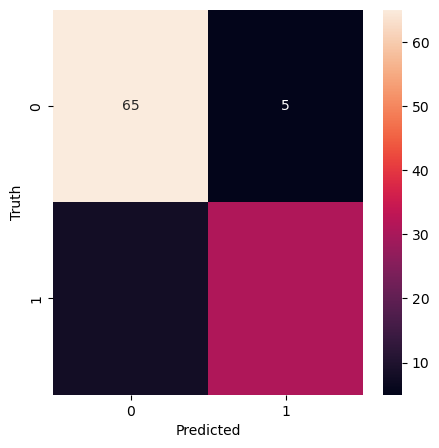

In [17]:
y_pred=All_factors.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [18]:
from sklearn import tree
All_Factors2 = tree.DecisionTreeClassifier()
All_Factors2.fit(x_train,y_train)
All_Factors2.score(x_test,y_test)

0.8256880733944955

In [19]:
Scores.append(All_Factors2.score(x_test,y_test))

### DECISION TREES CONFUSION MATRIX

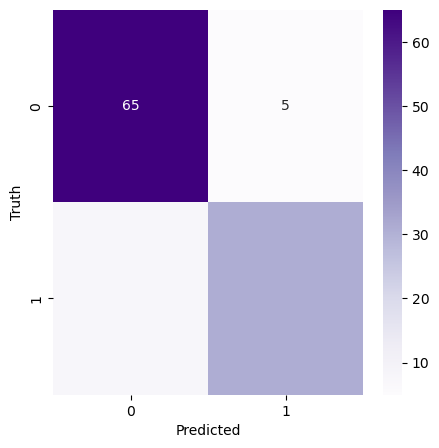

In [20]:
y_pred=All_factors.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [21]:
from sklearn.svm import SVC
All_Factors3= SVC()
All_Factors3.fit(x_train,y_train)
All_Factors3.score(x_test,y_test)

0.6422018348623854

In [22]:
Scores.append(All_Factors3.score(x_test,y_test))

### SVC CONFUSION MATRIX

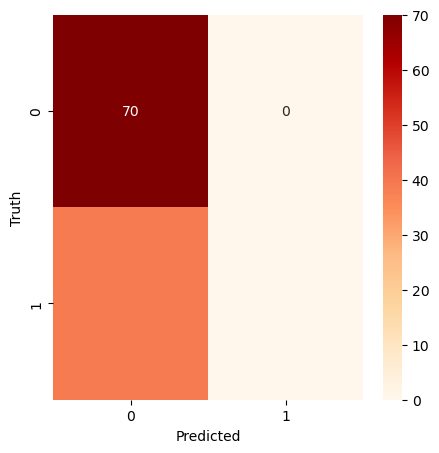

In [23]:
y_pred=All_Factors3.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="OrRd")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
All_Factors4 = LogisticRegression()
All_Factors4.fit(x_train,y_train)
All_Factors4.score(x_test,y_test)

0.8165137614678899

In [25]:
Scores.append(All_Factors4.score(x_test,y_test))

### LOGISTIC REGRESSION CONFUSION MATRIX

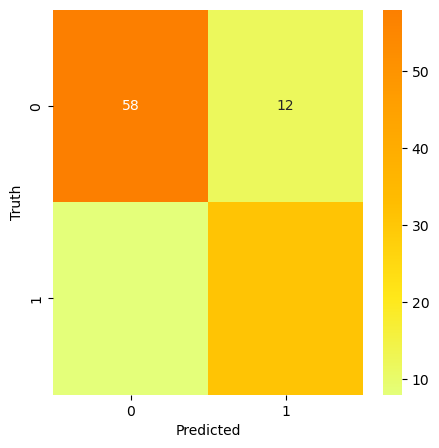

In [26]:
y_pred=All_Factors4.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap="Wistia")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

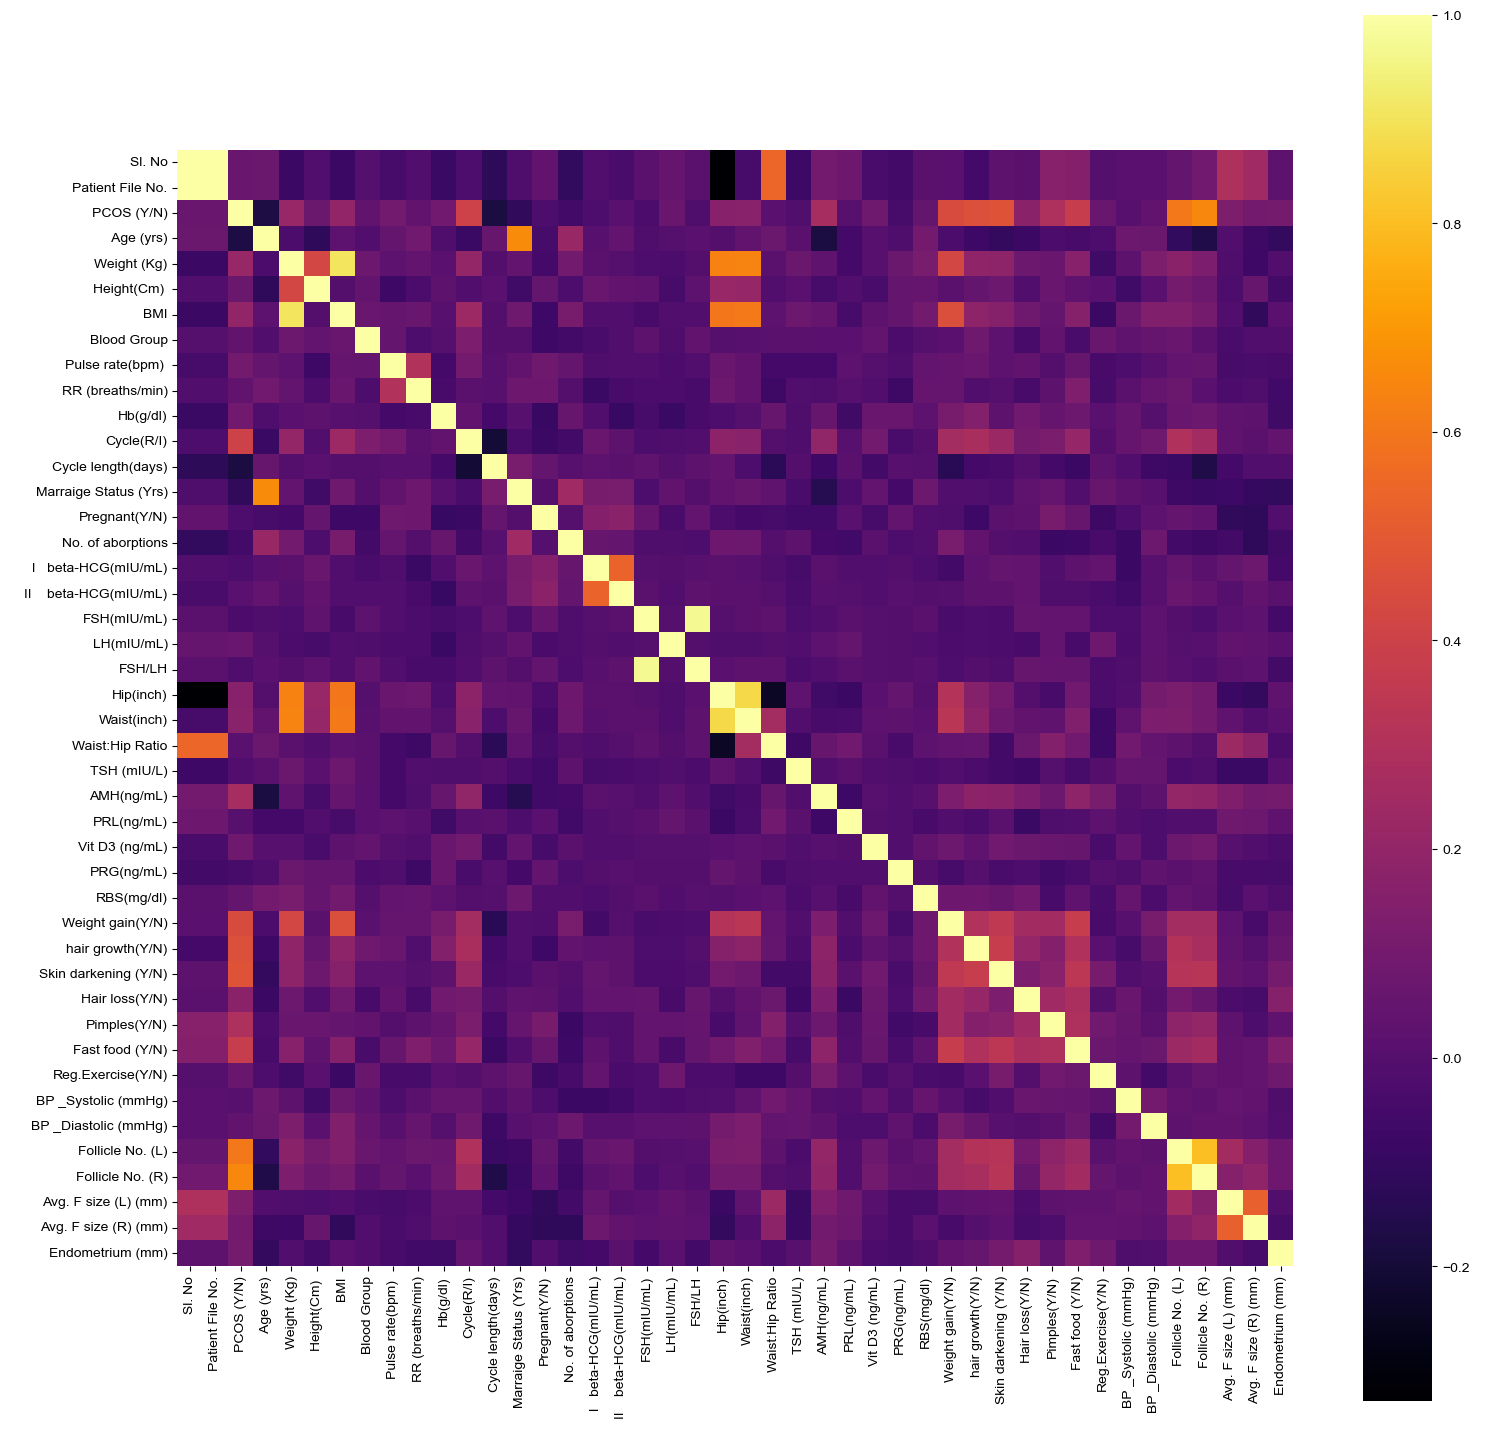

In [27]:
corrmat = pcos.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="inferno", square=True);
sns.set(font_scale=1.45)

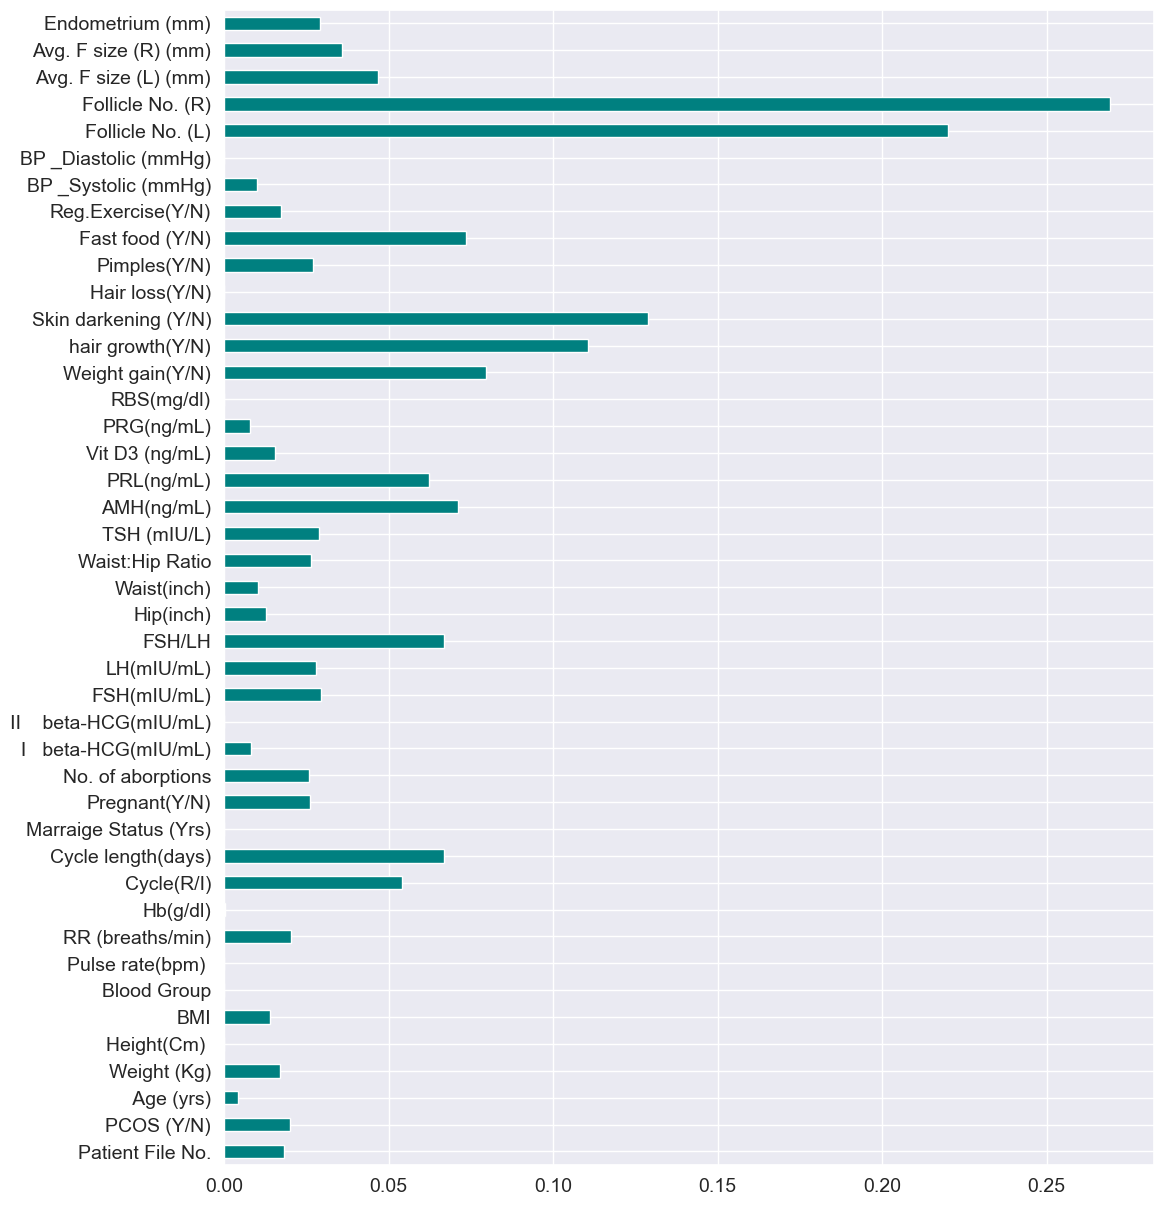

In [28]:
from sklearn.feature_selection import mutual_info_classif
imp = mutual_info_classif(pcos.drop("PCOS (Y/N)",axis="columns"), pcos['PCOS (Y/N)'])
feat_imp = pd.Series(imp, pcos.columns[1:len(pcos.columns)])
feat_imp.plot(kind='barh', color='teal', figsize=(12,15), fontsize=14, grid=True)
plt.show()

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
chi2_feat= SelectKBest(chi2,k=10)
feat= chi2_feat.fit_transform(pcos.drop("PCOS (Y/N)",axis="columns"), pcos['PCOS (Y/N)'])
feat.shape

(541, 10)

In [30]:
Xc_train,Xc_test,y_train,y_test =train_test_split(feat ,pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
chi2_factors = RandomForestClassifier(max_depth=40)
chi2_factors.fit(Xc_train,y_train)
chi2_factors.score(Xc_test,y_test)

0.8990825688073395

In [31]:
chi2_feat2= SelectKBest(chi2,k=30)
feat= chi2_feat2.fit_transform(pcos.drop("PCOS (Y/N)",axis="columns"), pcos['PCOS (Y/N)'])
feat.shape

(541, 30)

In [32]:
Xc2_train,Xc2_test,y_train,y_test =train_test_split(feat ,pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
from sklearn.ensemble import RandomForestClassifier
chi2_factors2 = RandomForestClassifier(max_depth=40)
chi2_factors2.fit(Xc2_train,y_train)
chi2_factors2.score(Xc2_test,y_test)

0.9174311926605505

In [33]:
Scores.append(chi2_factors2.score(Xc2_test,y_test))

Text(0.5, 1.0, 'How different attributes affect PCOS\n\n')

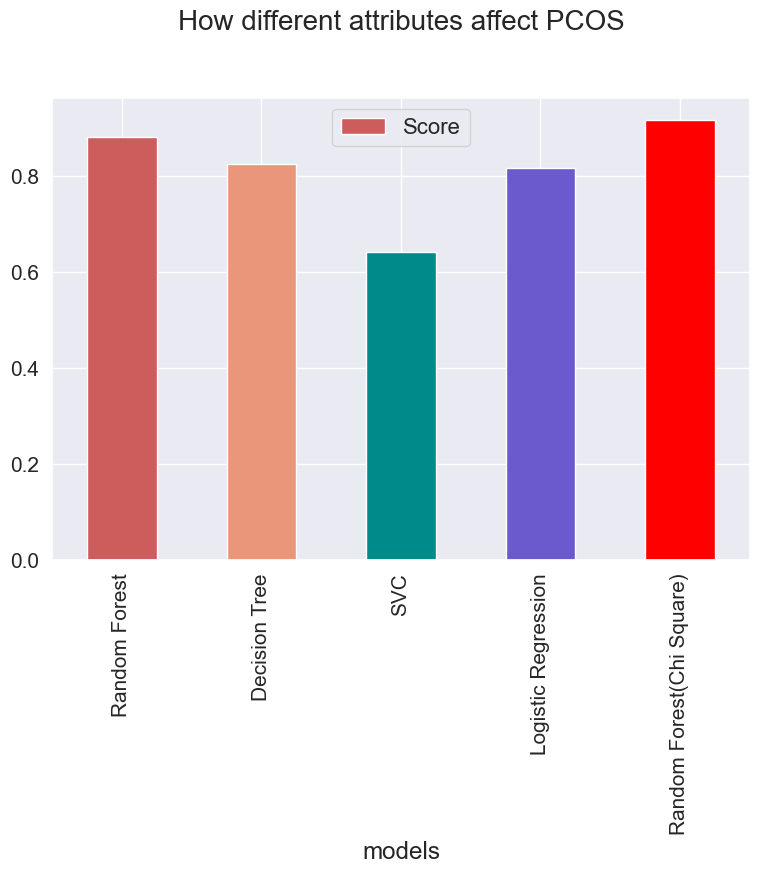

In [34]:
d1 = pd.DataFrame()
d1["models"]= Models
d1["Score"]=Scores
colour=["Indianred","darksalmon","darkcyan","Slateblue", "red"]
d1.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How different attributes affect PCOS\n\n', fontsize=20)

# How Physical Symptoms affect PCOS

Symptoms that can be observed without medical testing

GRAPH

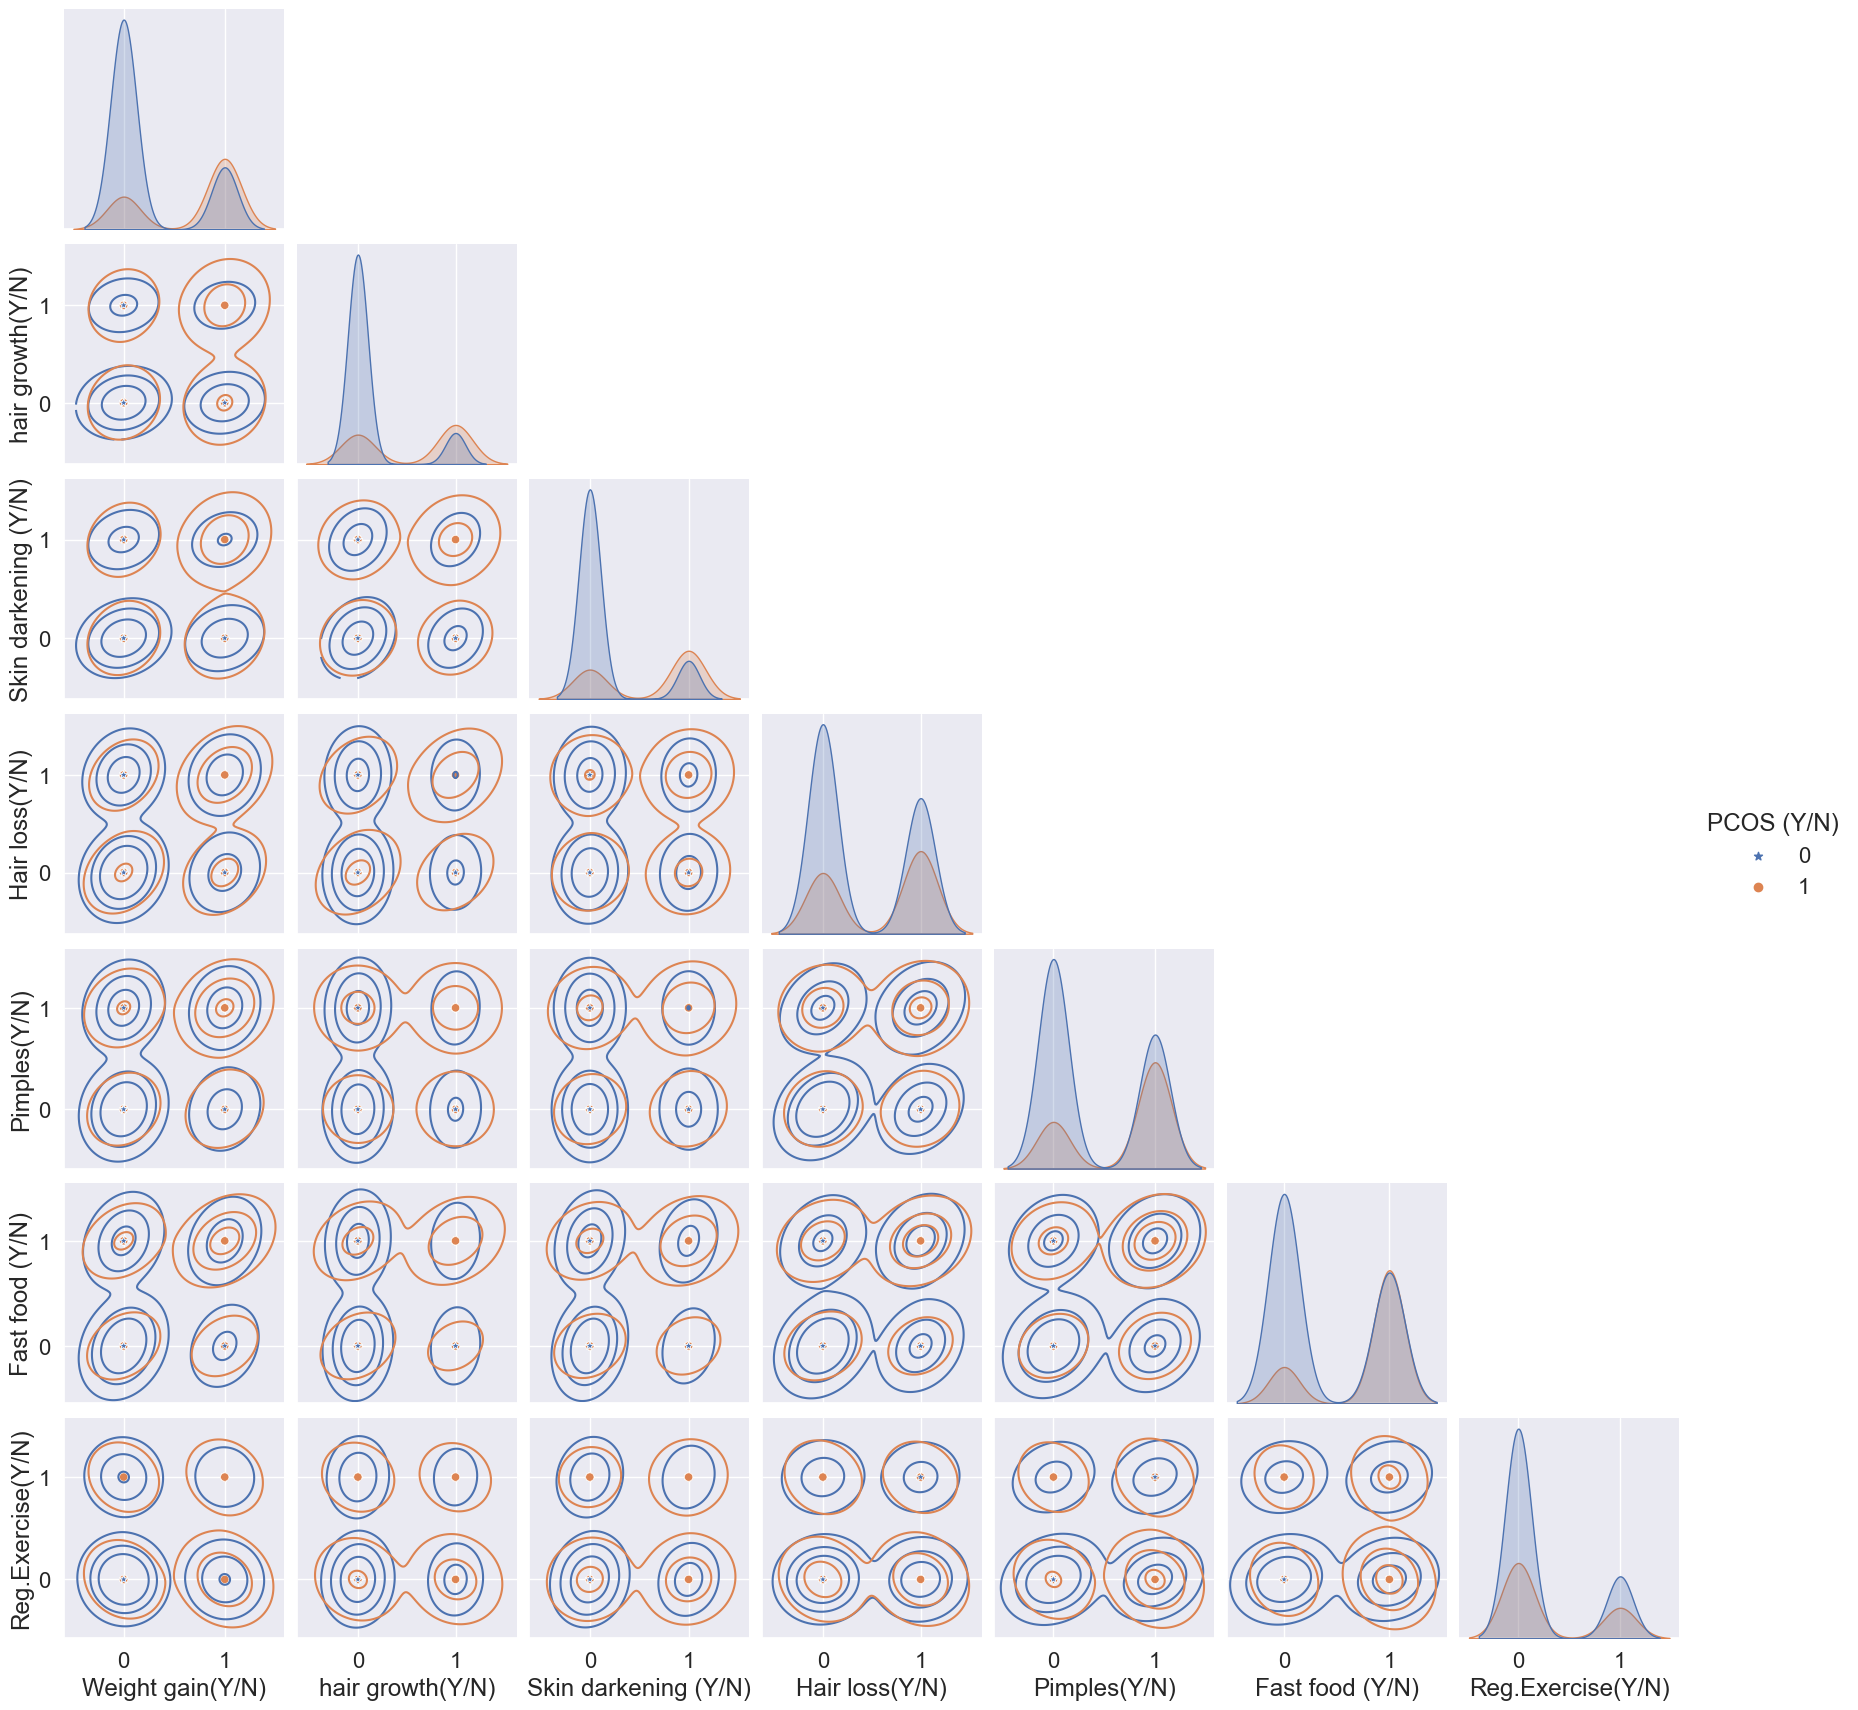

In [35]:
attributes2A=["PCOS (Y/N)",'Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)',\
              'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'Reg.Exercise(Y/N)']
g=sns.pairplot(pcos[attributes2A], hue="PCOS (Y/N)", corner=True, diag_kind="kde", markers=["*","o"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

### Individual Physical Factors affecting PCOS

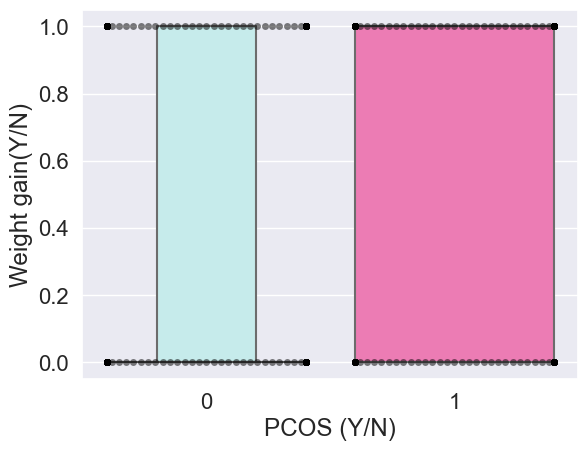

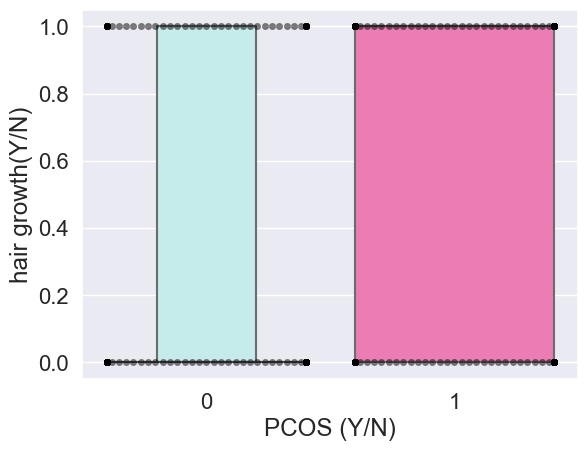

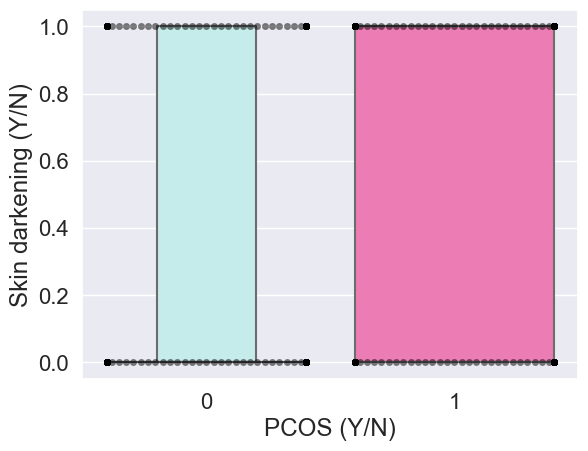

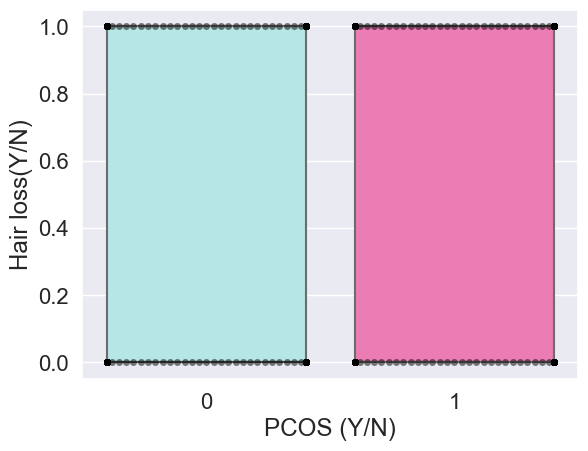

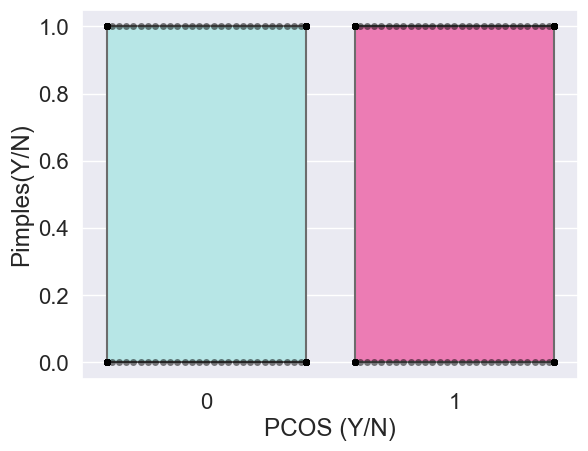

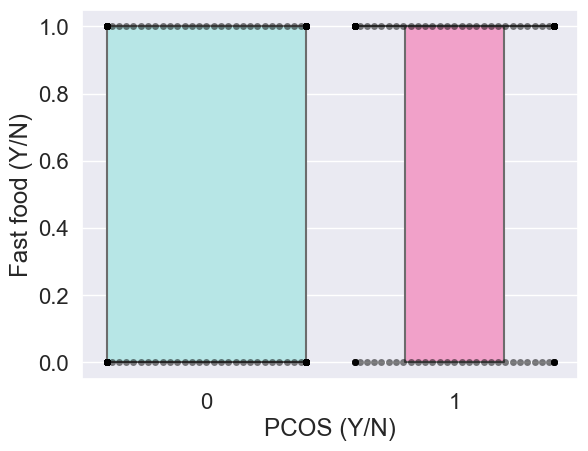

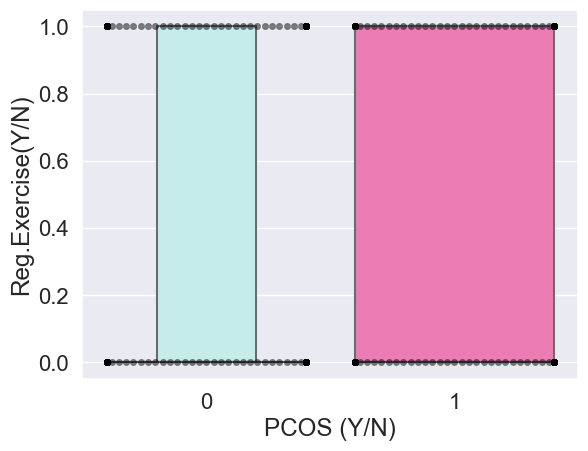

In [36]:
attributes2A1=['Weight gain(Y/N)', 'hair growth(Y/N)','Skin darkening (Y/N)',\
              'Hair loss(Y/N)', 'Pimples(Y/N)','Fast food (Y/N)', 'Reg.Exercise(Y/N)']
colours=['PaleTurquoise','HotPink']
for i in attributes2A1:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

## PREDICTION OF PCOS USING PHYSICAL SYMPTOMS

In [37]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score1 =[]

### - Using Random Forest Classifier

In [38]:
model1= RandomForestClassifier(max_depth=40)
attributes3=['Weight gain(Y/N)', 'hair growth(Y/N)',\
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',\
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

x_train1,x_test1,y_train1,y_test1 =train_test_split(pcos[attributes3],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)


In [39]:
model1.fit(x_train1,y_train1)

RandomForestClassifier(max_depth=40)

In [40]:
model1.score(x_test1,y_test1)

0.8073394495412844

In [41]:
import pickle

save_model = pickle.dumps(model1)

In [42]:
with open('model1.pkl', 'wb') as file:
    file.write(save_model)

In [43]:
Score1.append(model1.score(x_test1,y_test1))

### - Using Decision Tree

In [44]:
model1A = tree.DecisionTreeClassifier()
model1A.fit(x_train1,y_train1)

DecisionTreeClassifier()

In [45]:
model1A.score(x_test1,y_test1)

0.7614678899082569

In [46]:
Score1.append(model1A.score(x_test1,y_test1))

### - Using SVC

In [47]:
model1B= SVC()
model1B.fit(x_train1,y_train1)

SVC()

In [48]:
model1B.score(x_test1,y_test1)

0.7798165137614679

In [49]:
Score1.append(model1B.score(x_test1,y_test1))

### - Using Logistic Regression

In [50]:
model1C = LogisticRegression()
model1C.fit(x_train1,y_train1)

LogisticRegression()

In [51]:
model1C.score(x_test1,y_test1)

0.8073394495412844

In [52]:
Score1.append(model1C.score(x_test1,y_test1))

Text(0.5, 1.0, 'How Physical Symptoms affect PCOS\n\n')

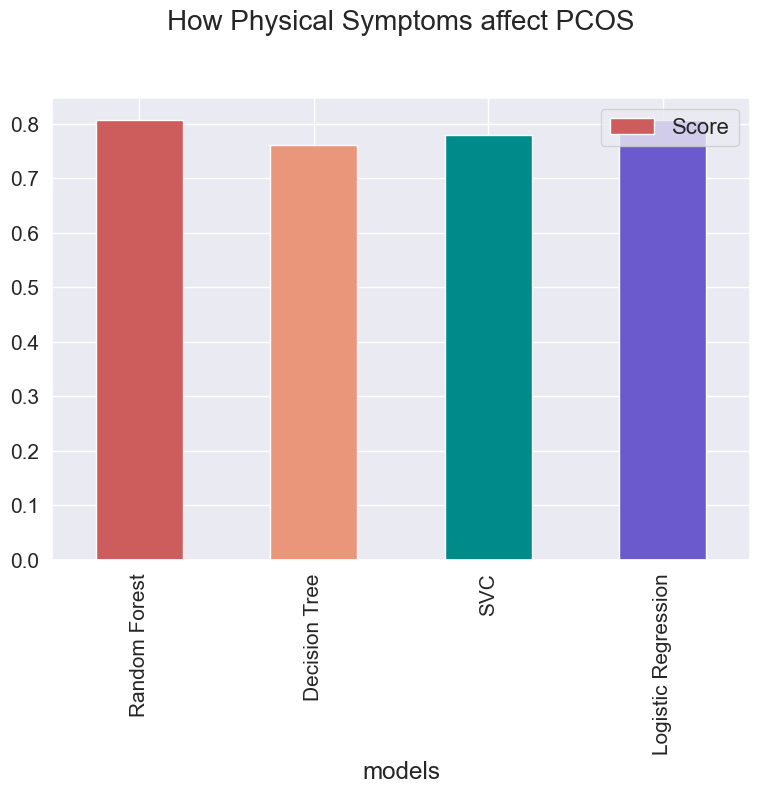

In [53]:
d1 = pd.DataFrame()
d1["models"]= Models
d1["Score"]=Score1
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d1.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Physical Symptoms affect PCOS\n\n', fontsize=20)

# How hormones affect pcos

GRAPH

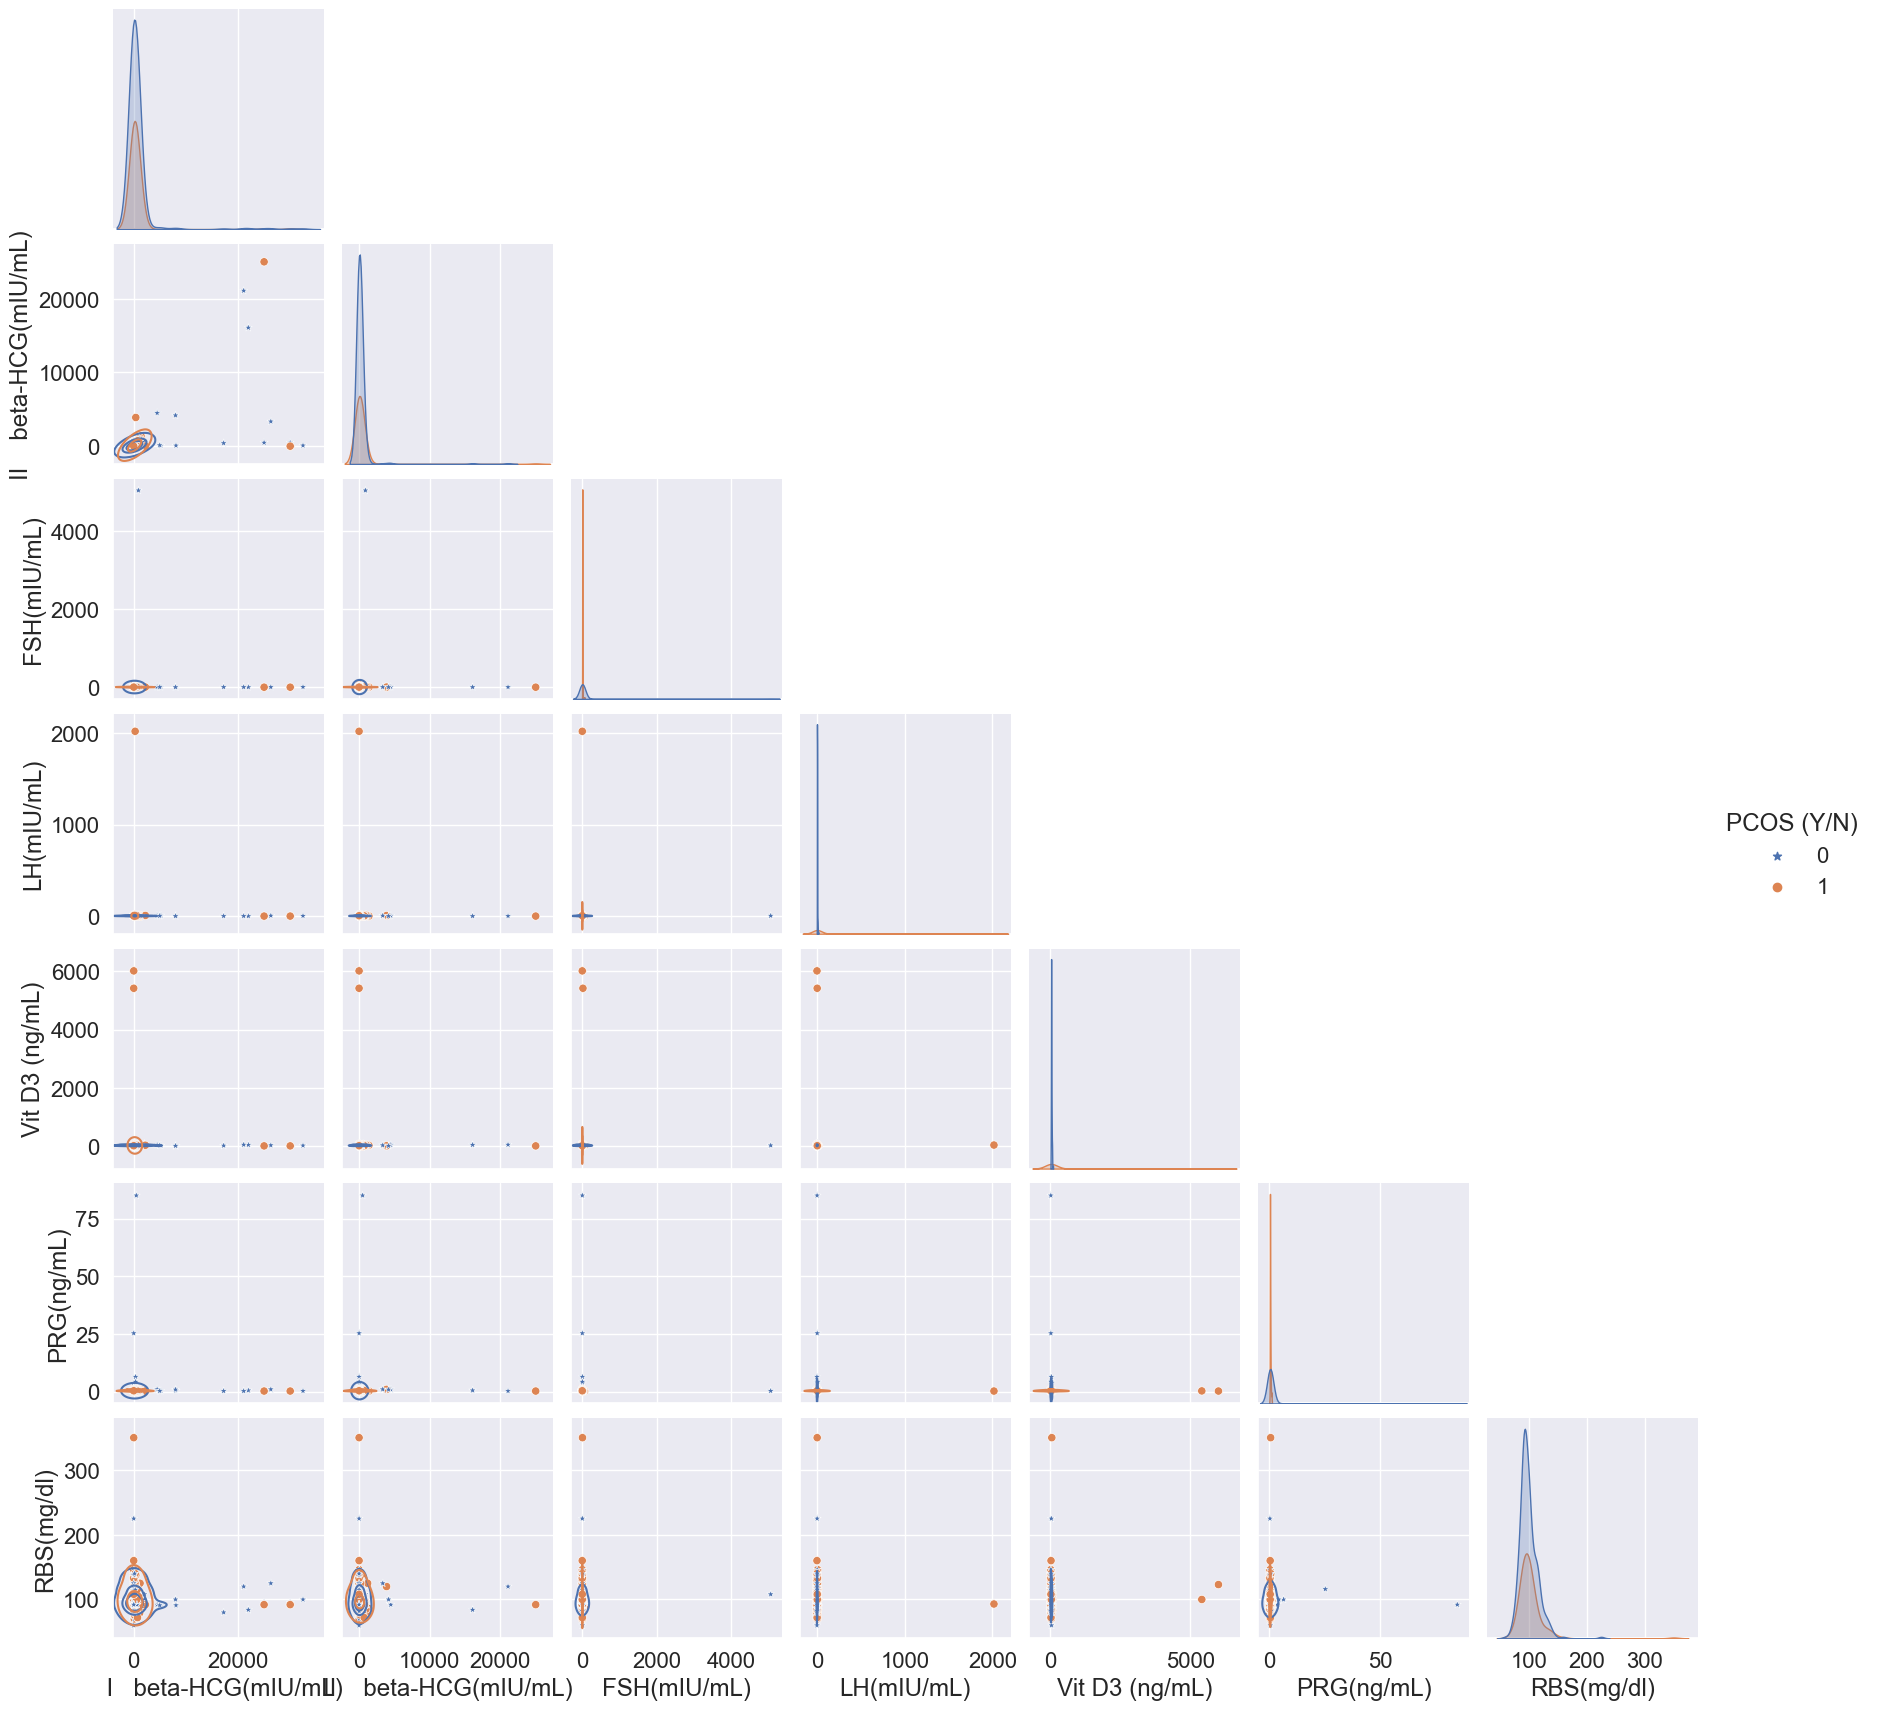

In [54]:
attributes=['PCOS (Y/N)','  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)']
hormone = pcos[attributes]
m= sns.pairplot(data=hormone, hue="PCOS (Y/N)", corner=True, diag_kind="kde", markers=["*","o"])
m.map_lower(sns.kdeplot, levels=4, color=".2")

## Individual Hormones Effects on PCOS 

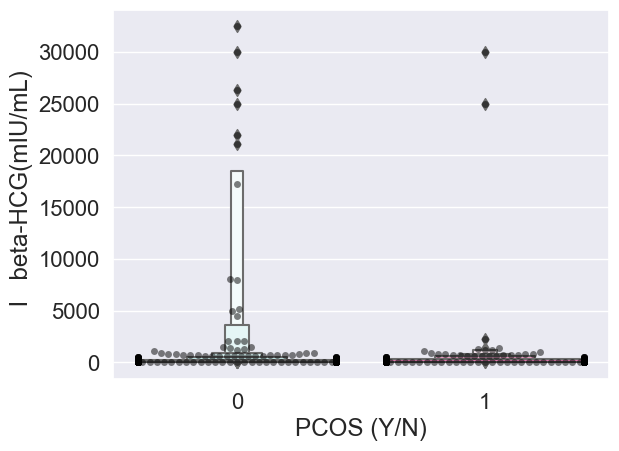

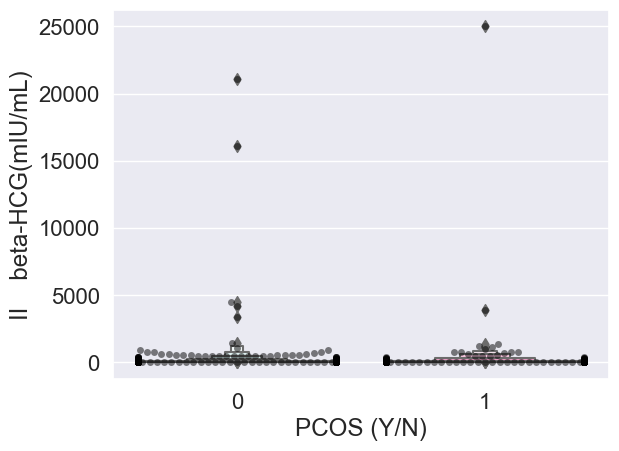

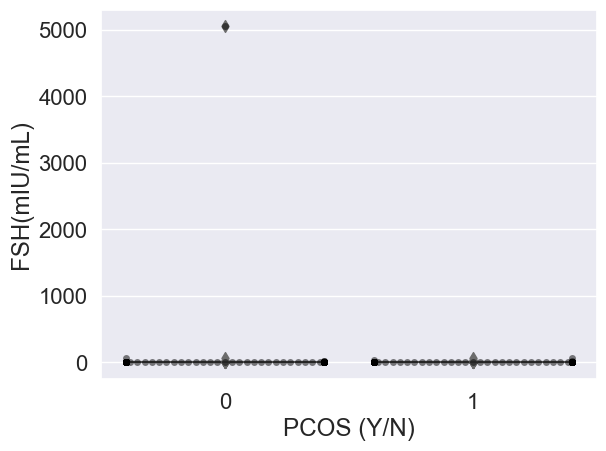

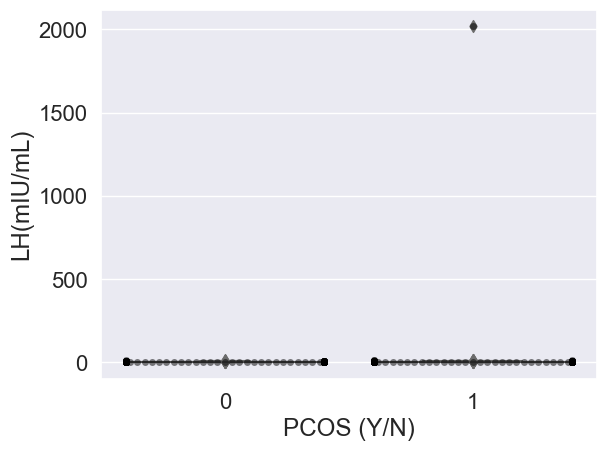

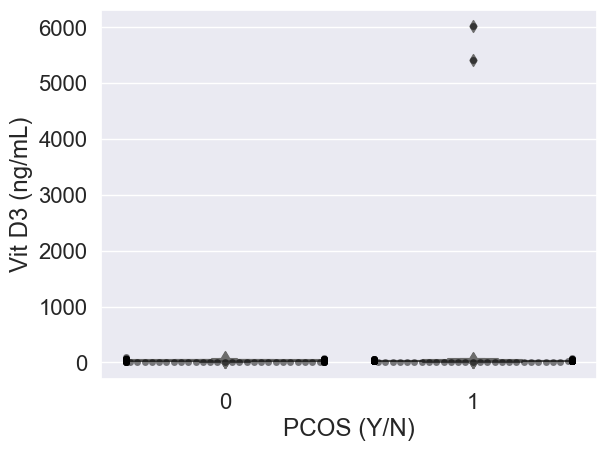

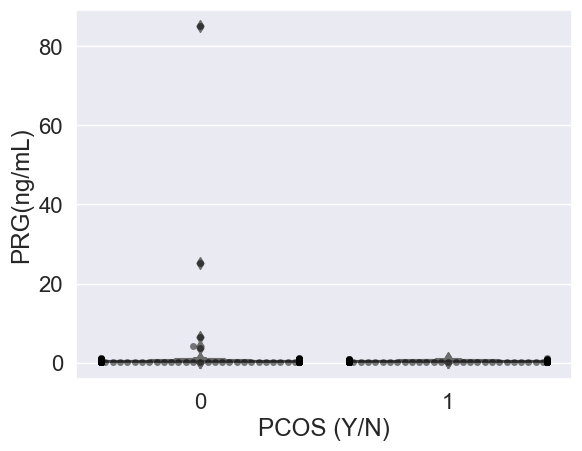

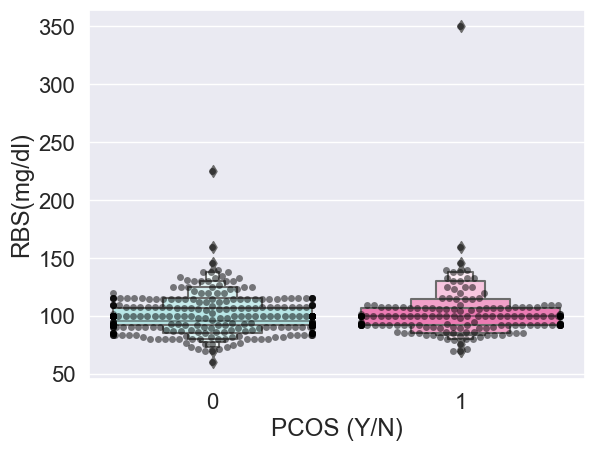

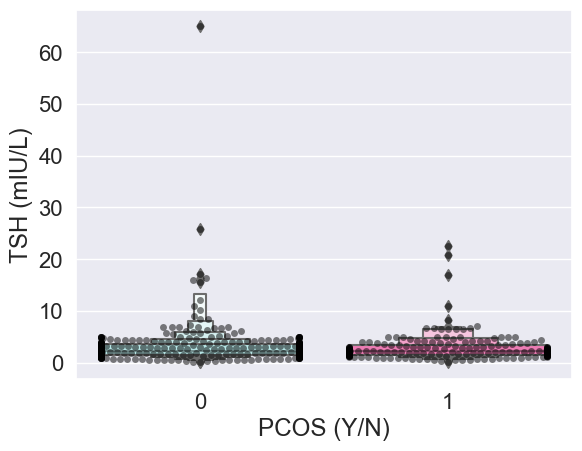

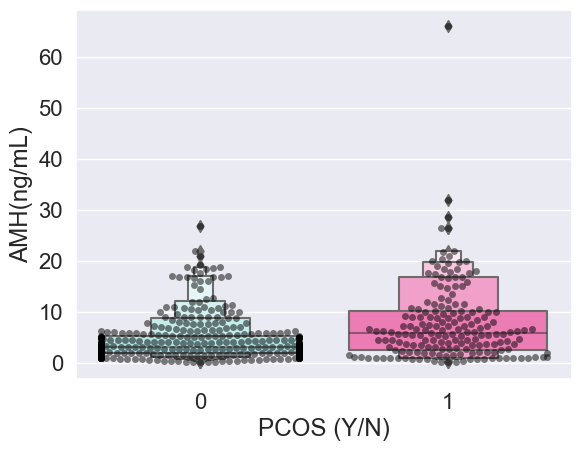

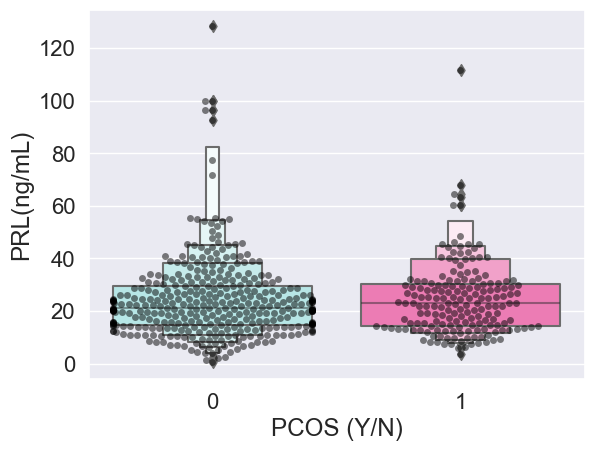

In [55]:
attributes1=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
for i in attributes1:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

PREDICTION OF PCOS USING THE HORMONES

In [56]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score =[]

## - Using Random Forest Classfier

In [57]:
attributes4=['  I   beta-HCG(mIU/mL)',\
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)','Vit D3 (ng/mL)', 'PRG(ng/mL)','RBS(mg/dl)','TSH (mIU/L)',\
       'AMH(ng/mL)', 'PRL(ng/mL)']
model2=RandomForestClassifier(max_depth=40)
x_train2,x_test2,y_train2,y_test2 =train_test_split(pcos[attributes4],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
model2.fit(x_train2,y_train2)

RandomForestClassifier(max_depth=40)

In [58]:
model2.score(x_test2,y_test2)

0.6605504587155964

In [59]:
Score.append(model2.score(x_test2,y_test2))

## - Using Decision Tree

In [60]:
model2A = tree.DecisionTreeClassifier()
model2A.fit(x_train2,y_train2)
model2A.score(x_test2, y_test2)

0.5779816513761468

In [61]:
Score.append(model2A.score(x_test2,y_test2))

## - Using SVC

In [62]:
model2B = SVC()
model2B.fit(x_train2,y_train2)
model2B.score(x_test2, y_test2)

0.6422018348623854

In [63]:
Score.append(model2B.score(x_test2,y_test2))

## - Using Logistic Regression

In [64]:
model2C = LogisticRegression()
model2C.fit(x_train2,y_train2)
model2C.score(x_test2, y_test2)

0.6330275229357798

In [65]:
Score.append(model2C.score(x_test2, y_test2))

Text(0.5, 1.0, 'How Hormone affect PCOS\n\n')

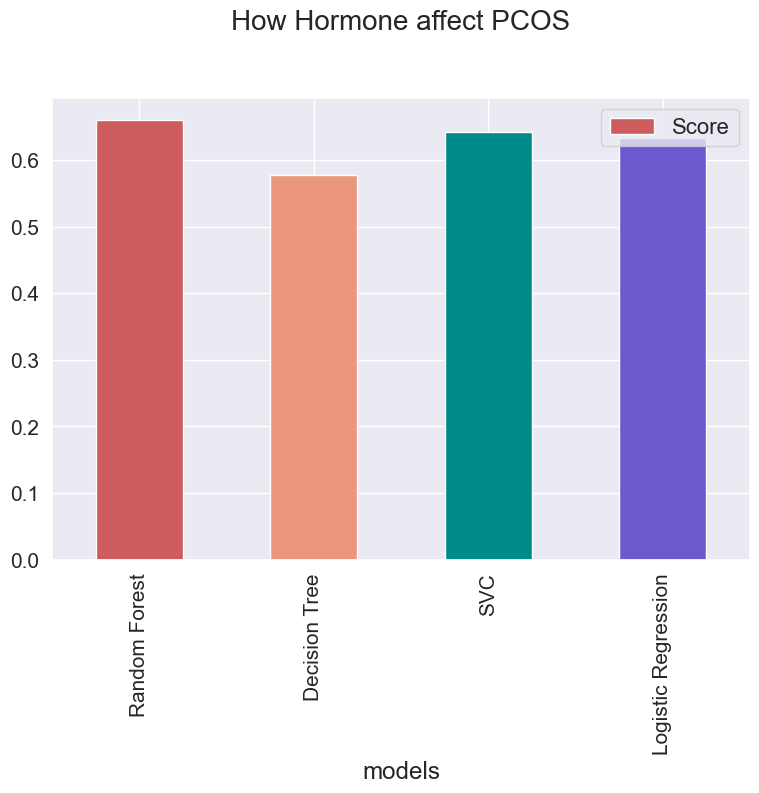

In [66]:
d2 = pd.DataFrame()
d2["models"]= Models
d2["Score"]=Score
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d2.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Hormone affect PCOS\n\n', fontsize=20)

# How Blood and Breathing parameters helps in predicting PCOS

GRAPH

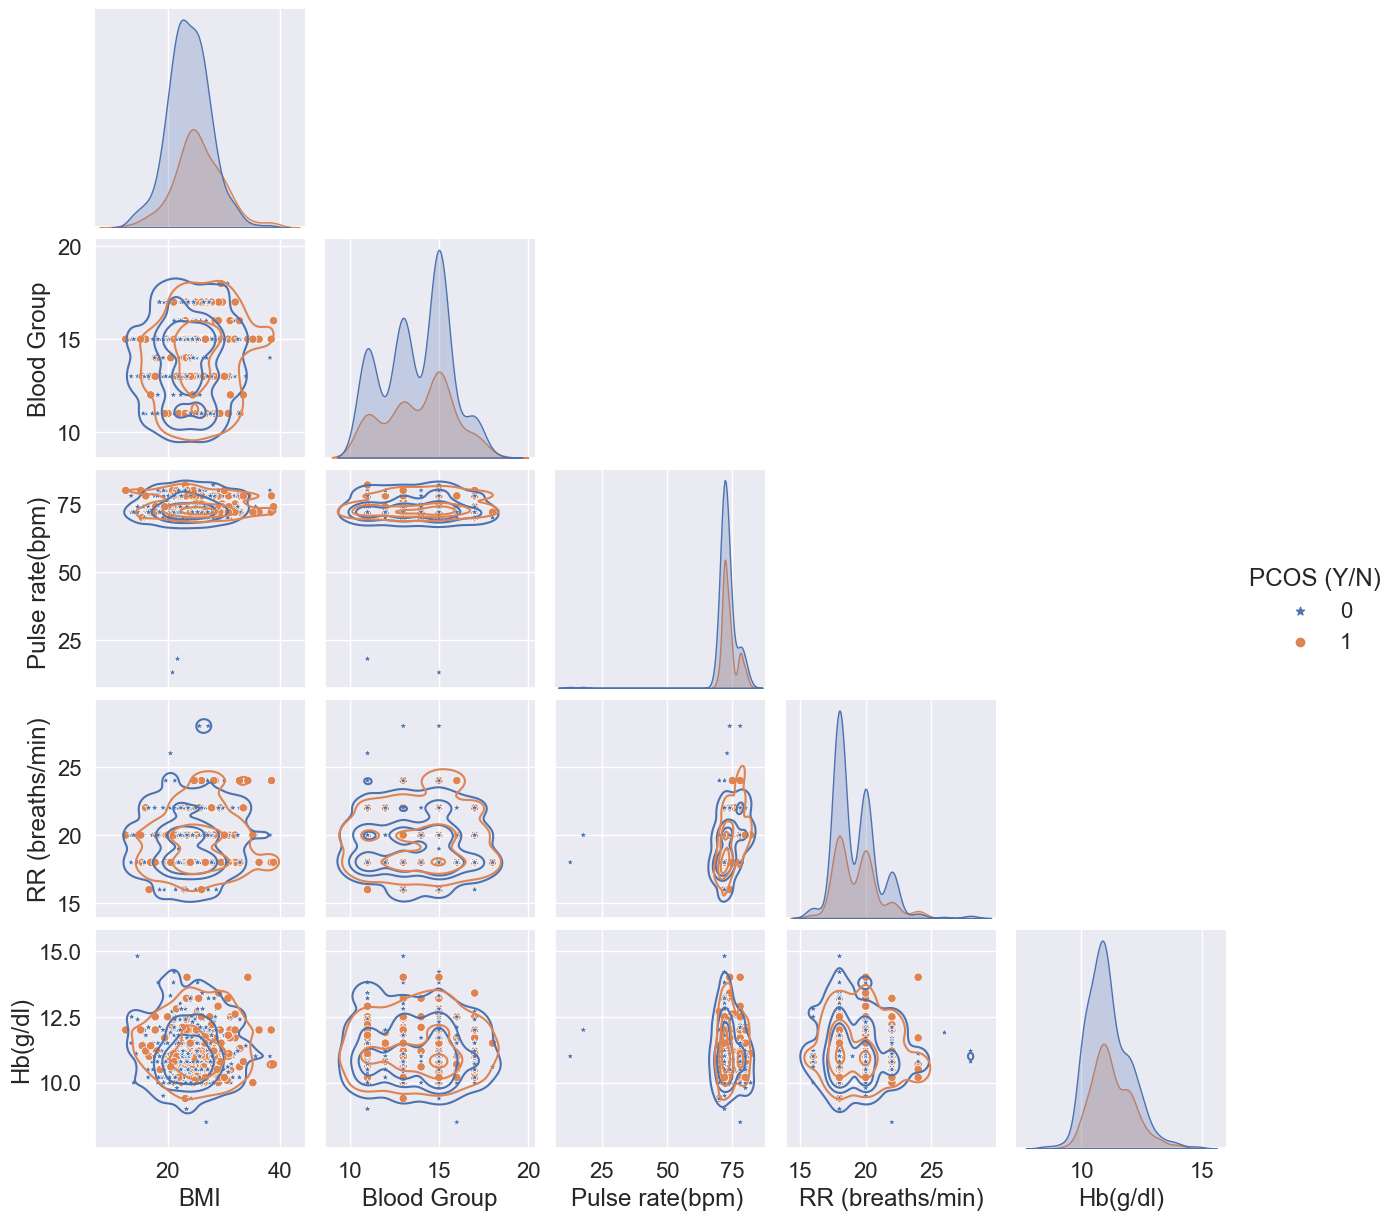

In [67]:
attributes2=['PCOS (Y/N)','BMI','Blood Group','Pulse rate(bpm) ','RR (breaths/min)','Hb(g/dl)']
n= sns.pairplot(pcos[attributes2], hue='PCOS (Y/N)', corner=True, diag_kind="kde", markers=["*","o"])
n.map_lower(sns.kdeplot, levels=4, color=".2")

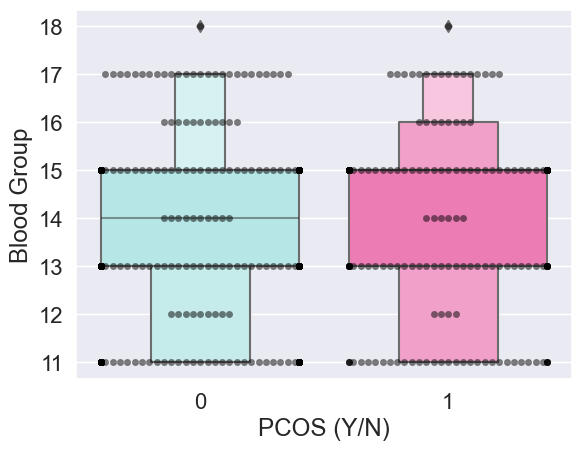

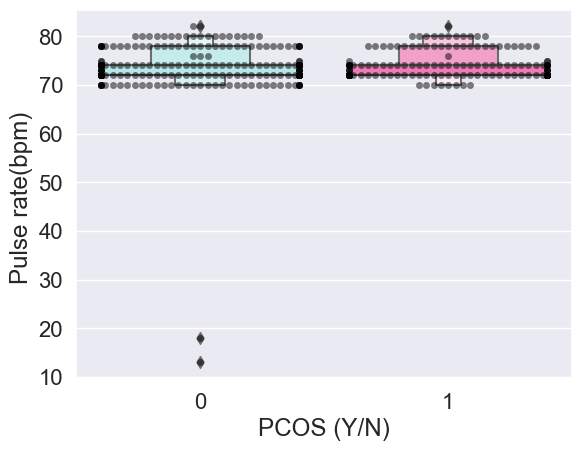

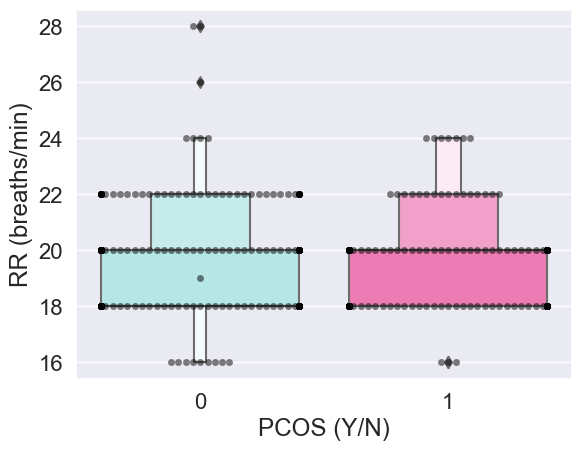

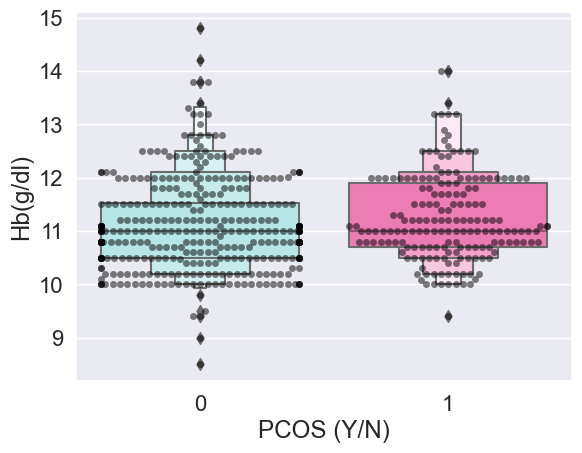

In [68]:
attributes5=['Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)']
for i in attributes5:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

## PREDICTING PCOS USING BLOOD AND BREATHING REPORTS

In [69]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score2 =[]

### - Random Forest Classifier

In [70]:
model3=RandomForestClassifier(max_depth=40)
x_train3,x_test3,y_train3,y_test3 =train_test_split(pcos[attributes5],pcos['PCOS (Y/N)'], test_size=0.2)
model3.fit(x_train3,y_train3)

RandomForestClassifier(max_depth=40)

In [71]:
model3.score(x_test3,y_test3)

0.6513761467889908

In [72]:
Score2.append(model3.score(x_test3,y_test3))

### - Using Decision Tree 

In [73]:
model3A = tree.DecisionTreeClassifier()
model3A.fit(x_train3,y_train3)
model3A.score(x_test3, y_test3)

0.6422018348623854

In [74]:
Score2.append(model3.score(x_test3,y_test3))

### - Using SVC

In [75]:
model3B = SVC()
model3B.fit(x_train3,y_train3)
model3B.score(x_test3, y_test3)

0.6880733944954128

In [76]:
Score2.append(model3B.score(x_test3, y_test3))

### - Using Logistic Regression

In [77]:
model2C = LogisticRegression()
model2C.fit(x_train3,y_train3)
model2C.score(x_test3, y_test3)

0.6972477064220184

In [78]:
Score2.append(model2C.score(x_test3, y_test3))

Text(0.5, 1.0, 'How Breathing and Blood Parameters affect PCOS\n\n')

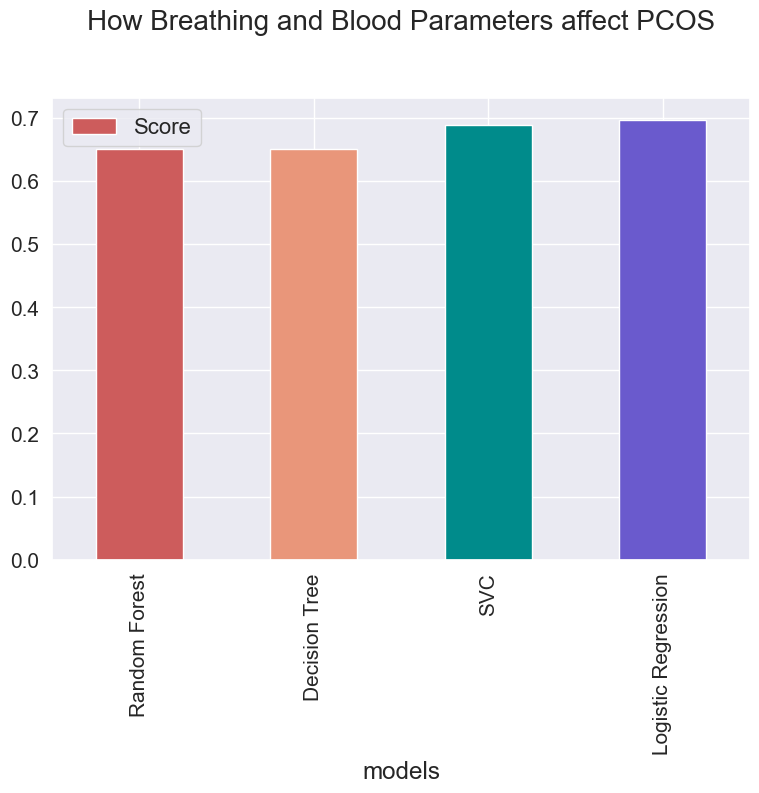

In [79]:
d3 = pd.DataFrame()
d3["models"]= Models
d3["Score"]=Score2
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d3.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('How Breathing and Blood Parameters affect PCOS\n\n', fontsize=20)

# Personal Features Affecting PCOS

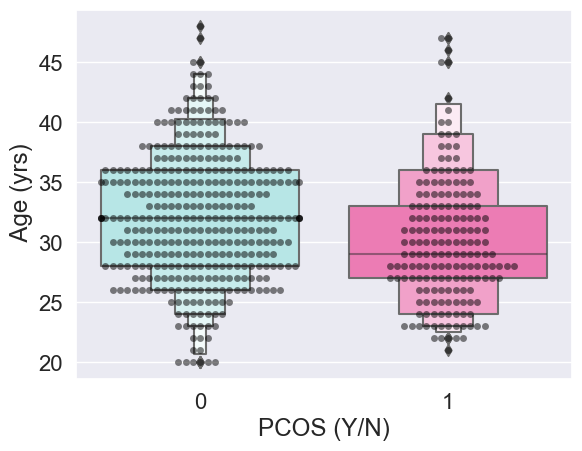

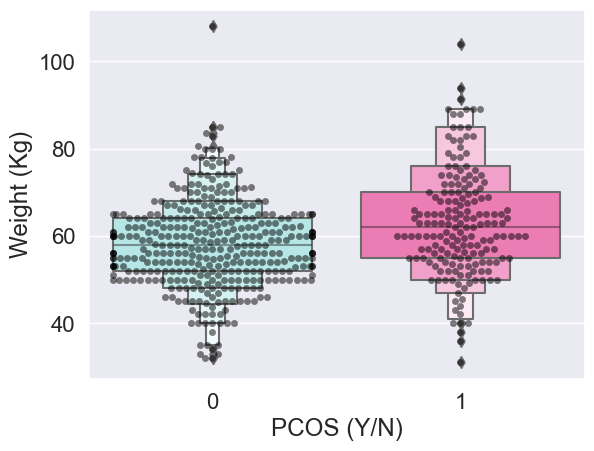

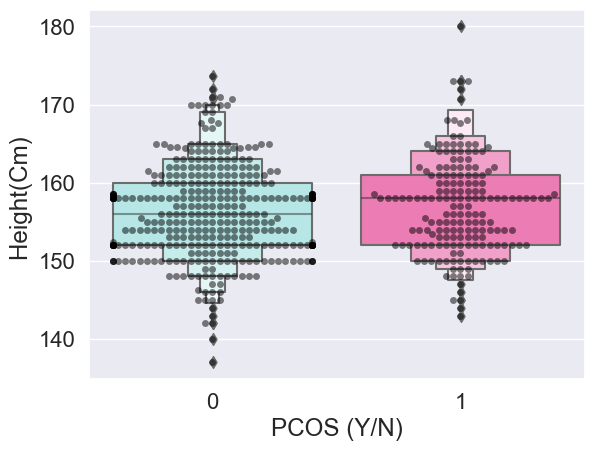

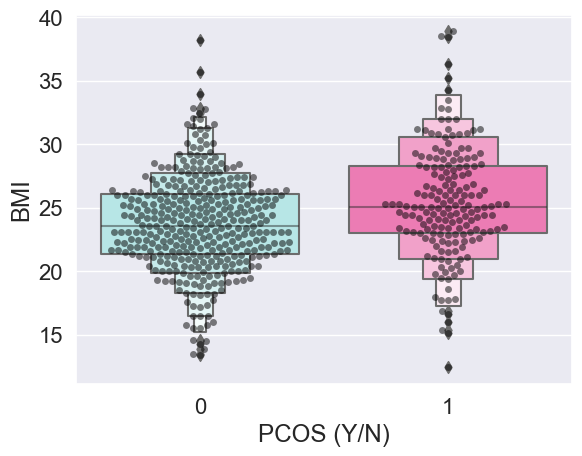

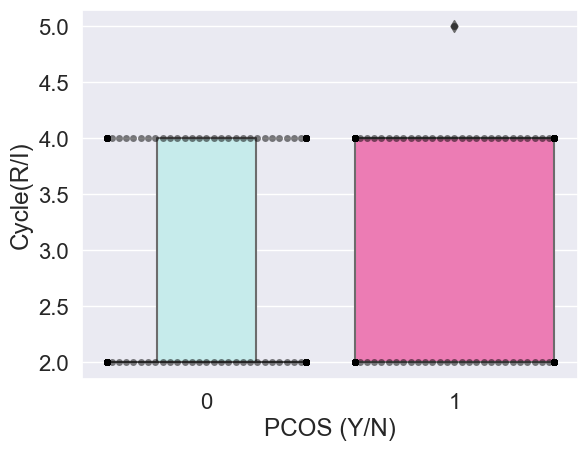

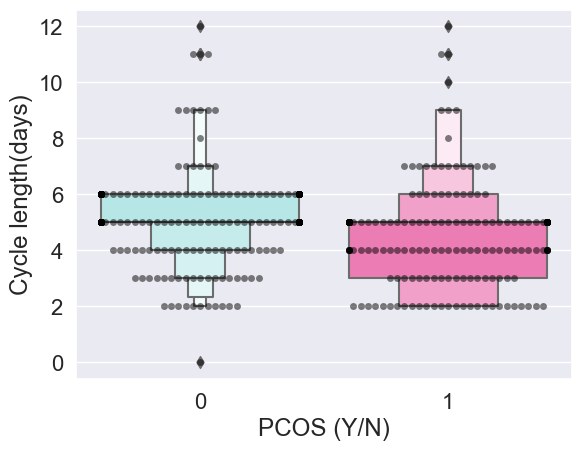

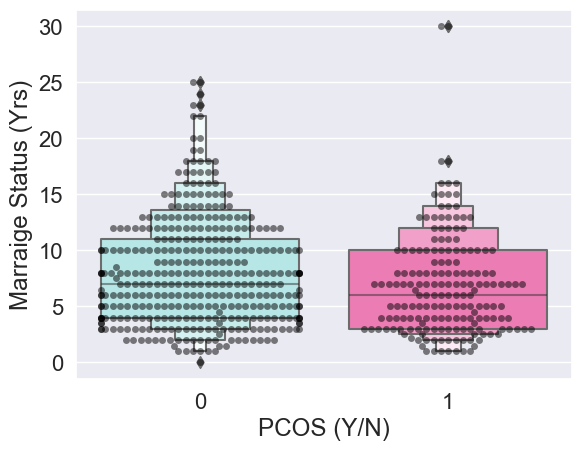

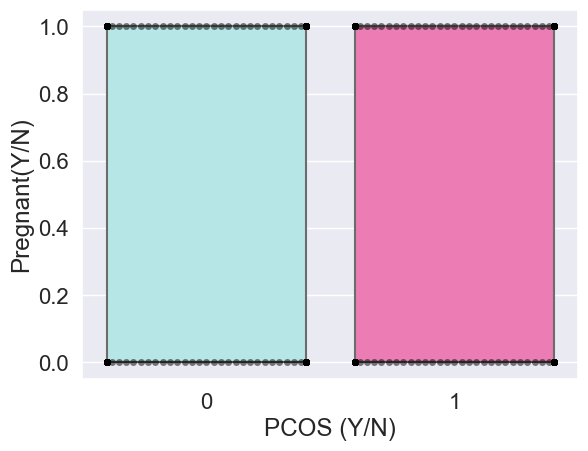

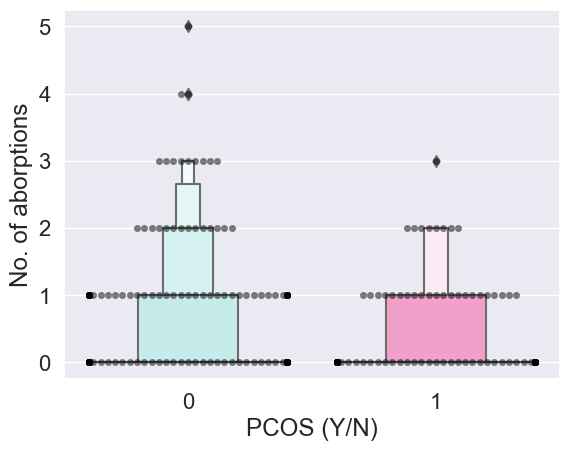

In [80]:
attributes6 = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI','Cycle(R/I)', 'Cycle length(days)',\
               'Marraige Status (Yrs)',\
       'Pregnant(Y/N)', 'No. of aborptions']
for i in attributes6:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

# Internal Organs Functioning Affecting PCOS

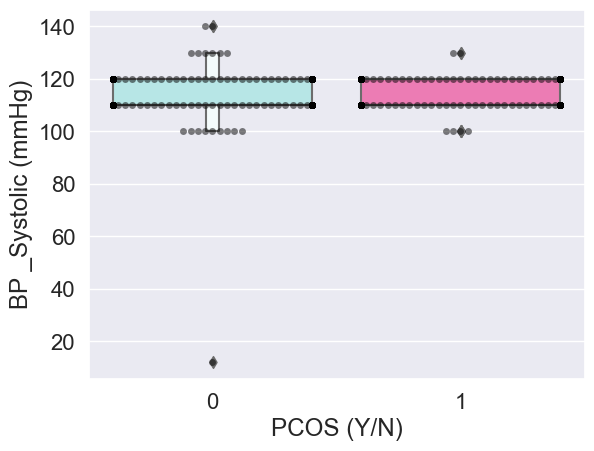

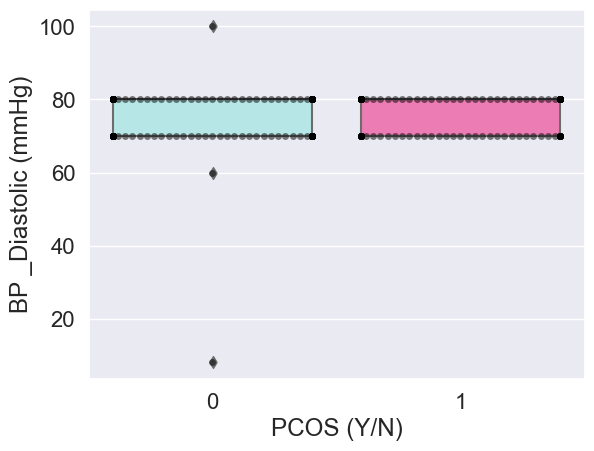

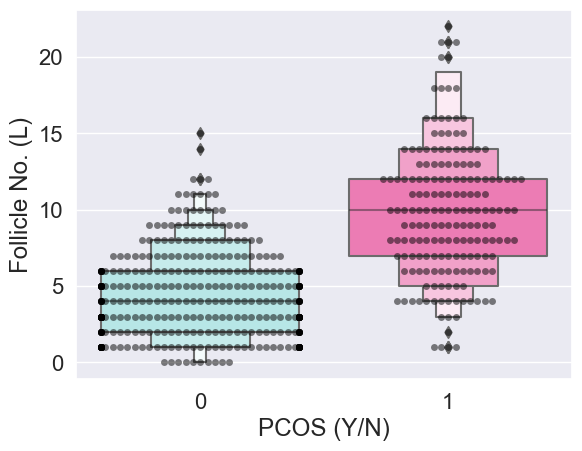

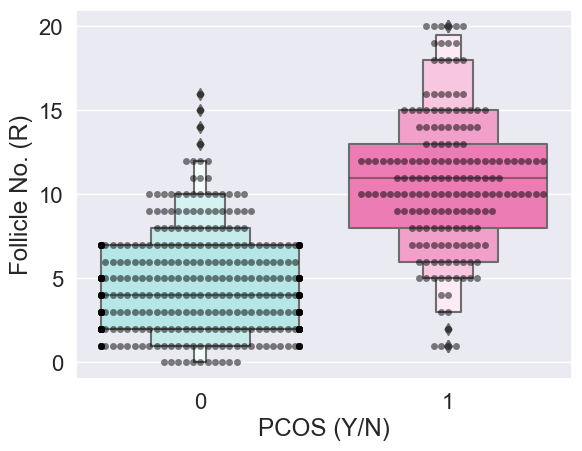

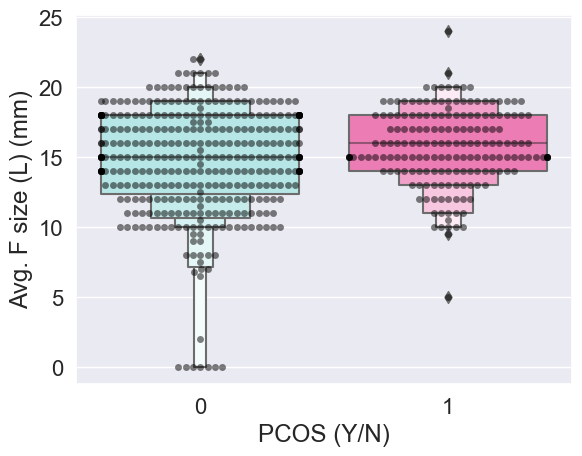

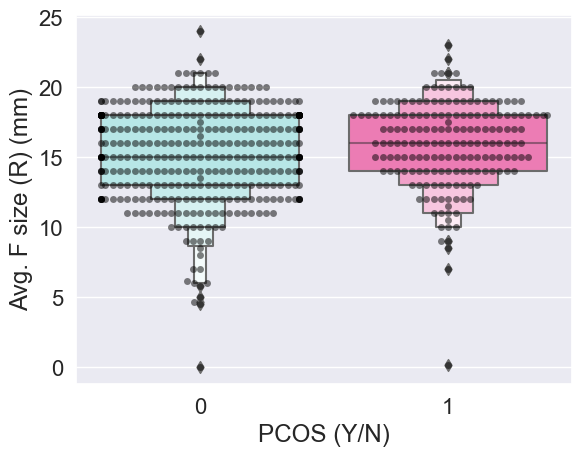

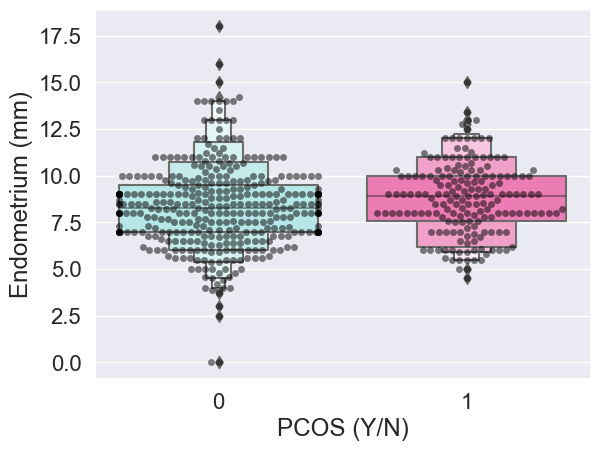

In [81]:
attributes7 = ['BP _Systolic (mmHg)',\
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',\
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
for i in attributes7:
    sns.swarmplot(x=pcos["PCOS (Y/N)"], y=pcos[i], color="black", alpha=0.5 )
    sns.boxenplot(x=pcos["PCOS (Y/N)"], y=pcos[i], palette=colours)
    plt.show()

In [82]:
Models =["Random Forest", "Decision Tree", "SVC", "Logistic Regression"]
Score4 =[]

In [83]:
model4=RandomForestClassifier(max_depth=40)
x_train4,x_test4,y_train4,y_test4 =train_test_split(pcos[attributes4],pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
model4.fit(x_train4,y_train4)

RandomForestClassifier(max_depth=40)

In [84]:
model4.score(x_test4,y_test4)

0.6605504587155964

In [85]:
Score4.append(model4.score(x_test4,y_test4))

In [86]:
model4A = tree.DecisionTreeClassifier()
model4A.fit(x_train4,y_train4)
model4A.score(x_test4, y_test4)

0.5963302752293578

In [87]:
Score4.append(model4A.score(x_test4,y_test4))

In [88]:
model4B = SVC()
model4B.fit(x_train4,y_train4)
model4B.score(x_test4, y_test4)

0.6422018348623854

In [89]:
Score4.append(model4B.score(x_test4, y_test4))

In [90]:
model4C = LogisticRegression()
model4C.fit(x_train4,y_train4)
model4C.score(x_test4, y_test4)

0.6330275229357798

In [91]:
Score4.append(model4C.score(x_test4, y_test4))

Text(0.5, 1.0, 'Internal Organs Functioning Affecting PCOS\n\n')

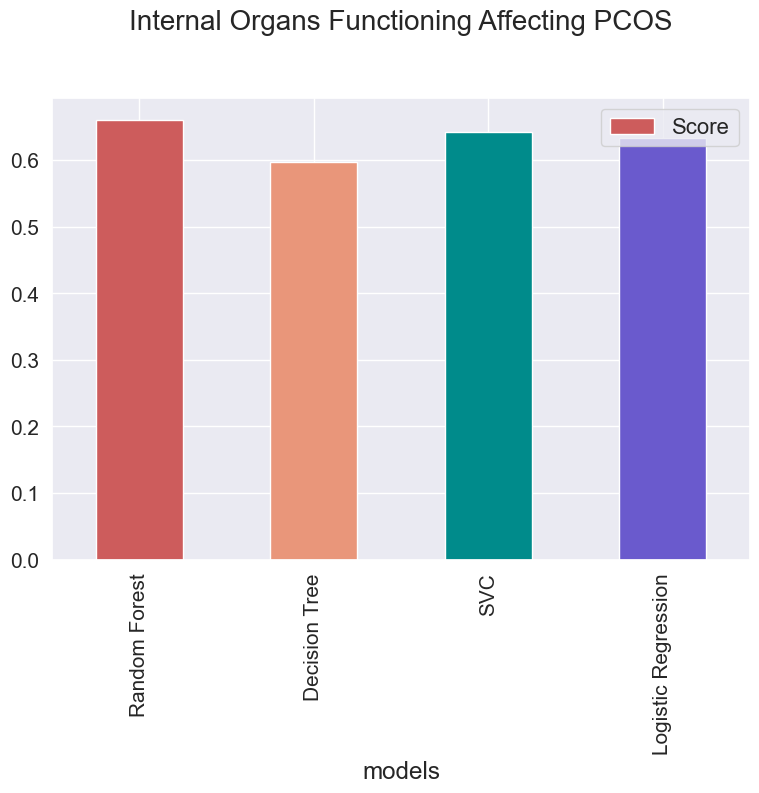

In [92]:
d4 = pd.DataFrame()
d4["models"]= Models
d4["Score"]=Score4
colour=["Indianred","darksalmon","darkcyan","Slateblue"]
d4.plot(kind="bar", x="models", y="Score", grid=True, figsize=(9,6), fontsize=15, color=colour)
plt.title('Internal Organs Functioning Affecting PCOS\n\n', fontsize=20)

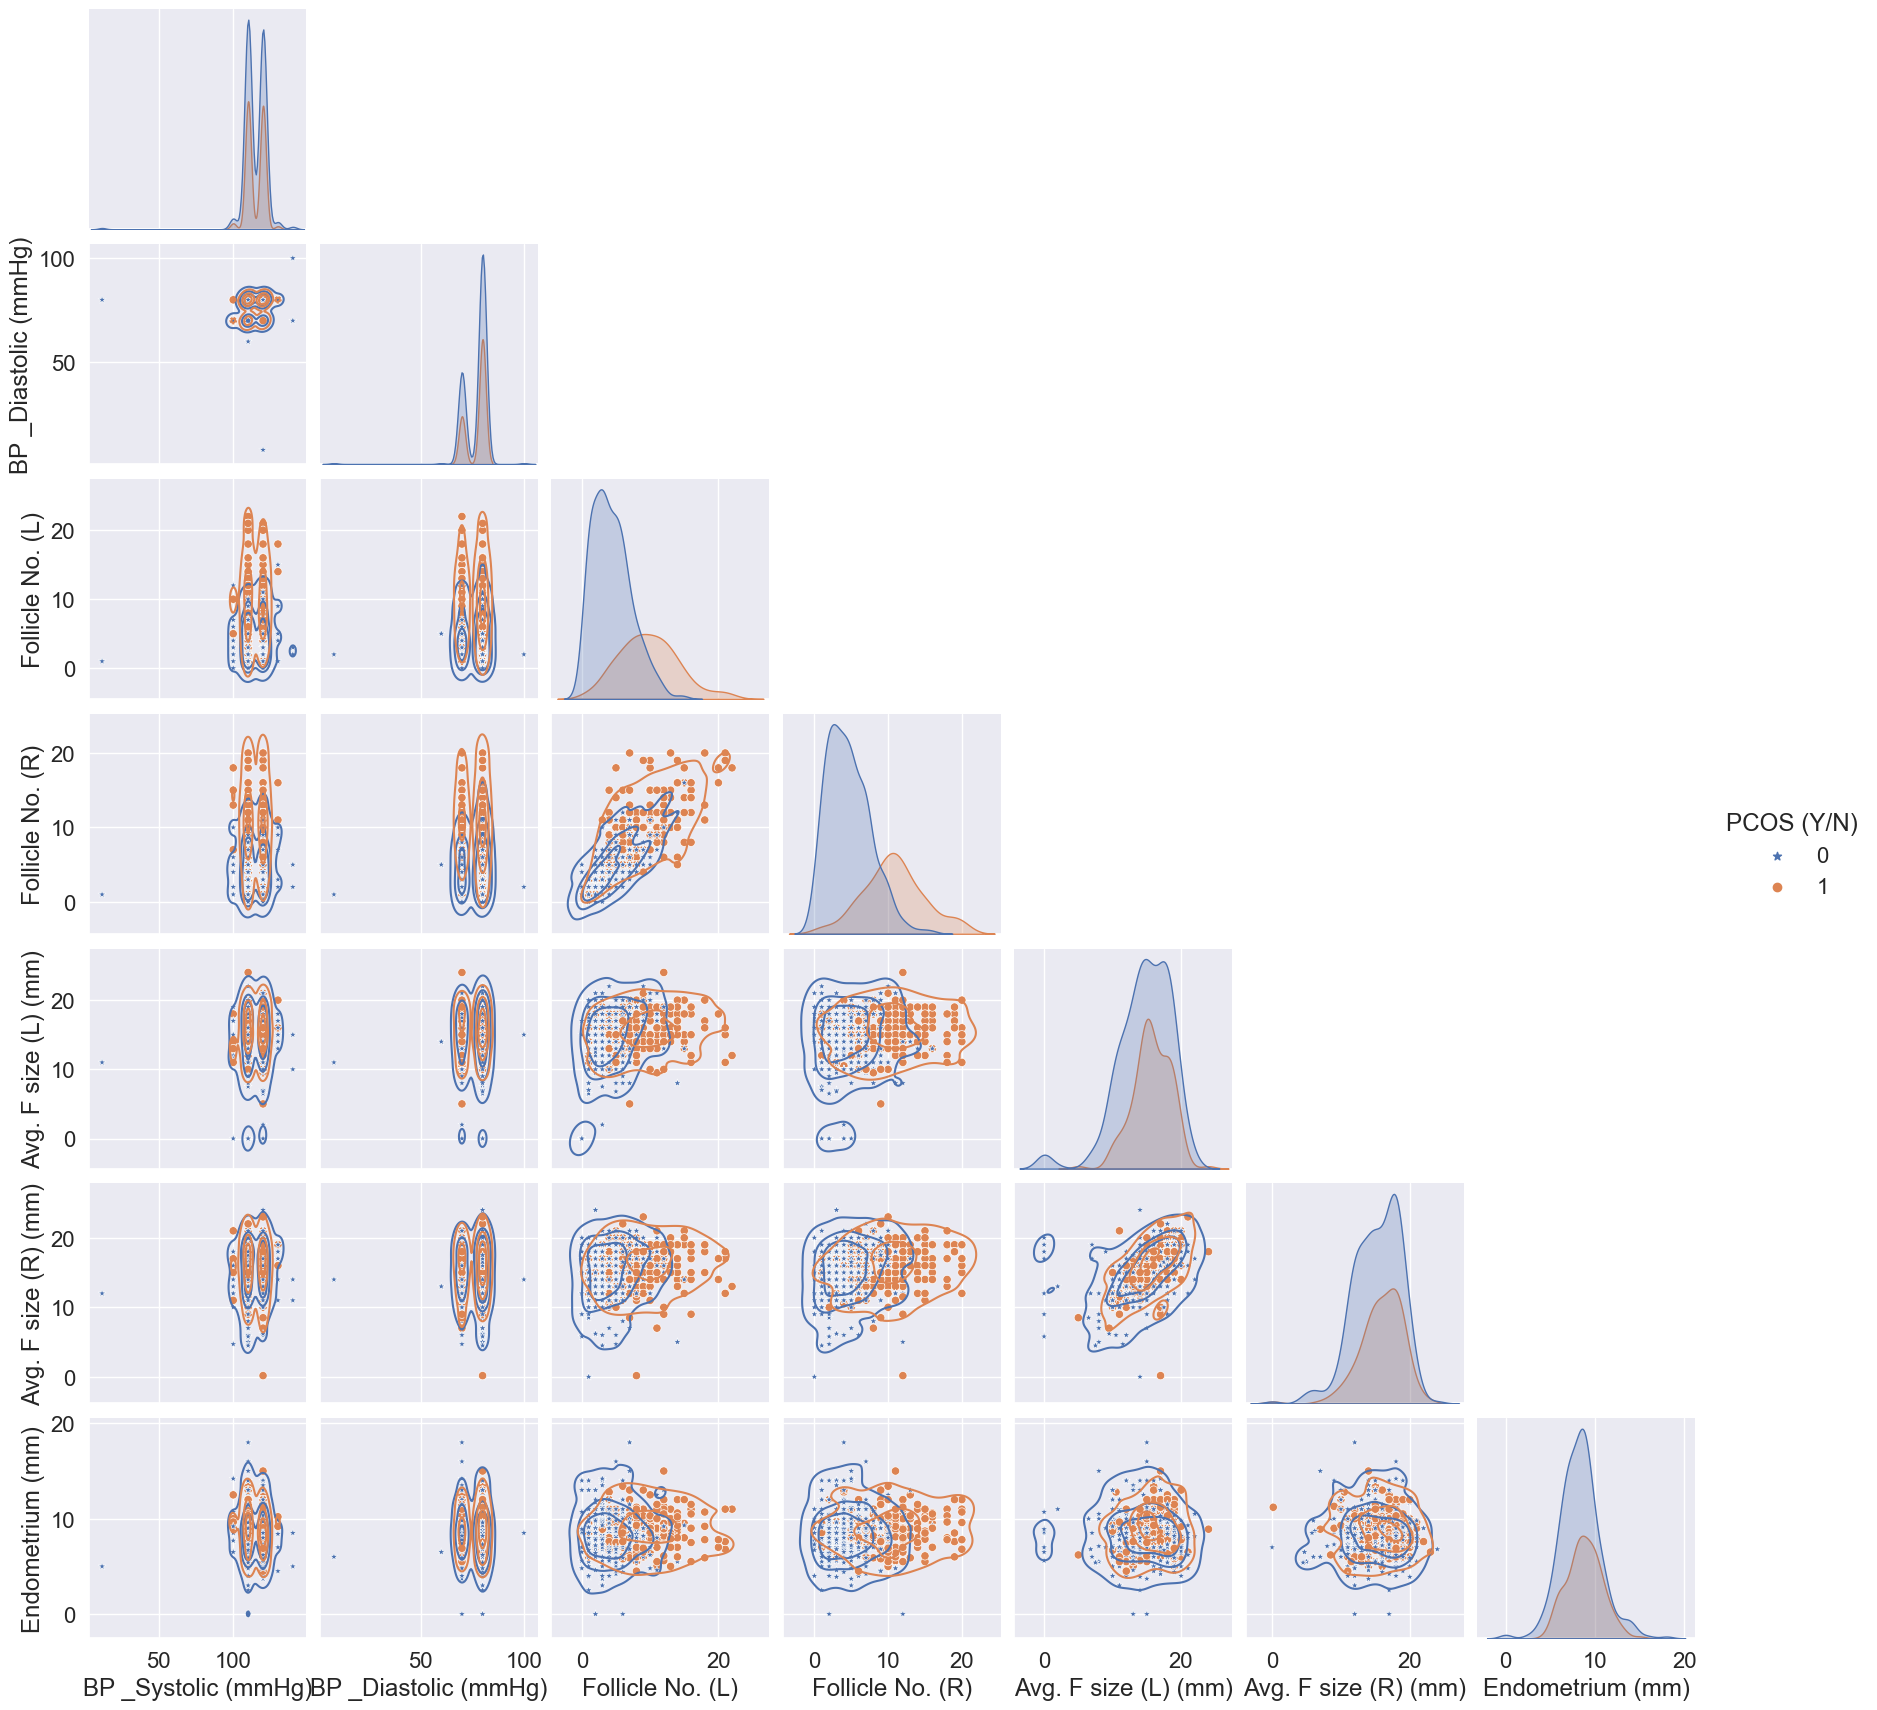

In [93]:
attributes4A=["PCOS (Y/N)",'BP _Systolic (mmHg)',\
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',\
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']
g=sns.pairplot(pcos[attributes4A], hue="PCOS (Y/N)", corner=True, diag_kind="kde", markers=["*","o"])
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define all attributes including the new ones
attributes = ['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
            'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
            'FSH(mIU/mL)', 'LH(mIU/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 
            'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'BP _Systolic (mmHg)', 
            'BP _Diastolic (mmHg)']

# Split the data based on the updated attributes
x_train, x_test, y_train, y_test = train_test_split(pcos[attributes], pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)

# Initialize and train the model
model = RandomForestClassifier(max_depth=40)
model.fit(x_train, y_train)

# Evaluate the model
accuracy = model.score(x_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7981651376146789


In [95]:
import pickle

# Train your model
model1 = RandomForestClassifier(max_depth=40)
x_train1, x_test1, y_train1, y_test1 = train_test_split(pcos[attributes], pcos['PCOS (Y/N)'], test_size=0.2, random_state=0)
model1.fit(x_train1, y_train1)

# Save the trained model to a file
with open('pcos_model.pkl', 'wb') as file:
    pickle.dump(model1, file)
